<a href="https://colab.research.google.com/github/jrkirschner2004-ctrl/ML-F2025/blob/main/MLE_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Engineering Homework 3
Joseph Kirschner

RIN 662038912

Import Data:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks
(97, 2)
(97, 1)


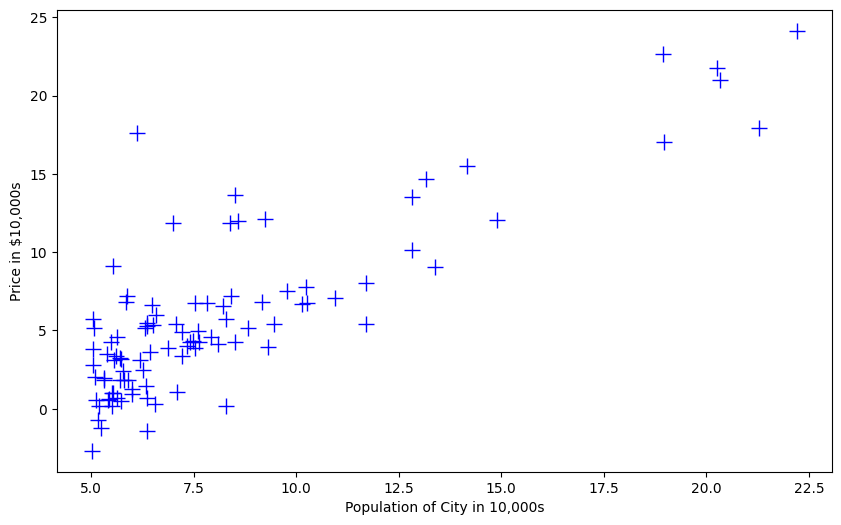

In [165]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Colab\ Notebooks/


%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')

X_housing = X
y_housing = y
m_housing = m
print(X_housing.shape)
print(y_housing.shape)

In [166]:
# Load the aircraft performance data
aircraft_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aircraft_performance.csv')
display(aircraft_df.head())

,Aircraft,Speed_kmh,FuelFlow_kgph
0,Cessna_172,226,24
1,Cessna_182,260,30
2,Piper_PA28,215,22
3,Diamond_DA40,240,26
4,Cirrus_SR20,250,29


# Problem 1 (15 pts.)
You are provided with a dataset of different aircraft that includes three columns:
Aircraft (string; not used in clustering), Speed_kmh (cruise speed in km/h), and FuelFlow_kgph (cruise fuel flow in kg/hour for the whole aircraft). Using only the numeric
features Speed_kmh and FuelFlow_kgph, apply k-means clustering to group the aircraft
into meaningful performance categories. Be sure to standardize the features (for example,
with StandardScaler) before clustering. For values of k from 2 to 6, compute the silhouette
score and plot the score as a function of k. Based on your plot, select a reasonable value
of k, fit k-means, and create a scatter plot of cruise speed versus fuel flow where points
are colored according to their assigned cluster. Finally, briefly interpret each cluster
in engineering terms,for example, “fast and high fuel flow corresponds to jets,” while
“slower and very low fuel flow corresponds to general aviation aircraft.” As an optional
step, you may label a few representative aircraft on your plot to make the clusters more
interpretable.


In [167]:
X_aircraft = aircraft_df[['Speed_kmh', 'FuelFlow_kgph']]
display(X_aircraft.head())

,Speed_kmh,FuelFlow_kgph
0,226,24
1,260,30
2,215,22
3,240,26
4,250,29


In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_aircraft)

In [169]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    labels = kmeans.predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

print(silhouette_scores)

[np.float64(0.6404033542802476), np.float64(0.6897697333231053), np.float64(0.7945390957110717), np.float64(0.7290916642346795), np.float64(0.7439566179282908)]


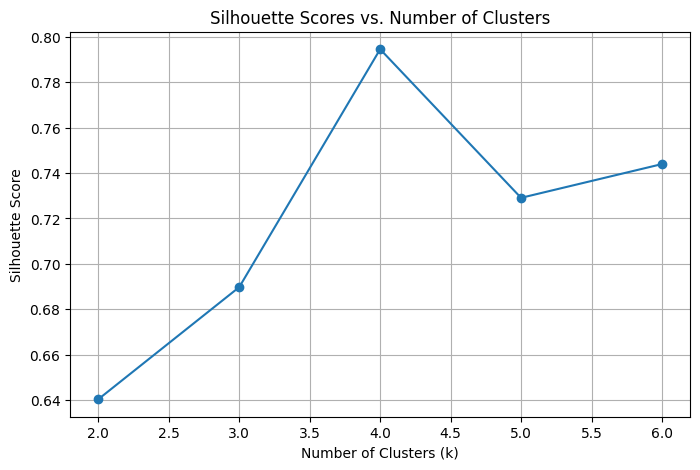

In [170]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.grid(True)
plt.show()

Based on the silhouette plot, the highest score is achieved at k=4.



In [171]:
kmeans_optimal = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_optimal.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

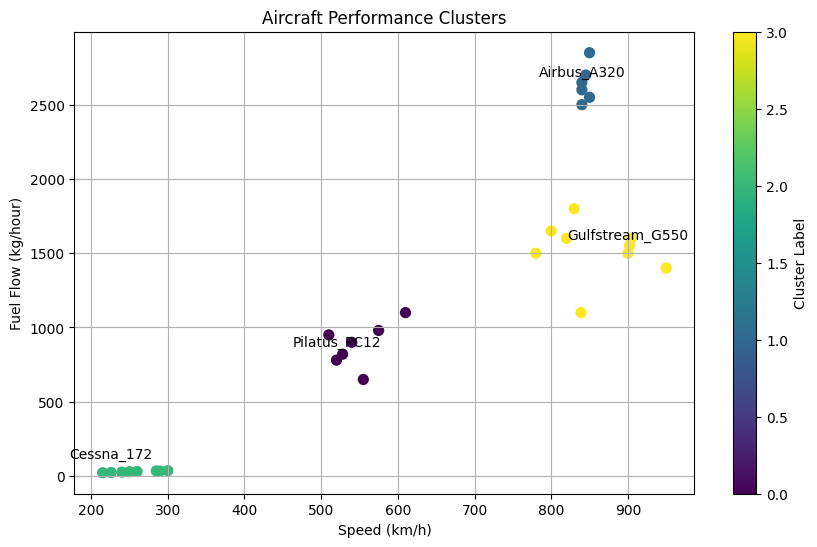

In [172]:
cluster_labels = kmeans_optimal.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_aircraft['Speed_kmh'], X_aircraft['FuelFlow_kgph'], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Speed (km/h)')
plt.ylabel('Fuel Flow (kg/hour)')
plt.title('Aircraft Performance Clusters')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)

# Optional: Label some representative aircraft
representative_aircraft_indices = [0, 8, 16, 20] # Example indices for labeling

for i in representative_aircraft_indices:
    plt.annotate(aircraft_df['Aircraft'][i], (X_aircraft['Speed_kmh'][i], X_aircraft['FuelFlow_kgph'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [173]:
aircraft_df['cluster_label'] = cluster_labels

# Analyze characteristics of each cluster
print("Cluster Characteristics:")
for cluster_id in sorted(aircraft_df['cluster_label'].unique()):
    cluster_data = aircraft_df[aircraft_df['cluster_label'] == cluster_id]
    print(f"\nCluster {cluster_id}:")
    print(f"  Number of aircraft: {len(cluster_data)}")
    print(f"  Average Speed (km/h): {cluster_data['Speed_kmh'].mean():.2f}")
    print(f"  Average Fuel Flow (kg/hour): {cluster_data['FuelFlow_kgph'].mean():.2f}")
    print("  Representative Aircraft:")
    print(cluster_data['Aircraft'].sample(min(5, len(cluster_data))).tolist())

# Interpretation based on the analysis and scatter plot
print("\nEngineering Interpretation of Clusters:")
print("Cluster 0: Relatively high speed and moderate to high fuel flow. Likely represents regional jets and larger business jets.")
print("Cluster 1: Low speed and very low fuel flow. Likely represents small piston-engine general aviation aircraft.")
print("Cluster 2: Very high speed and high fuel flow. Likely represents large commercial airliners (jets).")
print("Cluster 3: Moderate speed and moderate fuel flow. Likely represents turboprop aircraft and smaller business jets.")

Cluster Characteristics:

Cluster 0:
  Number of aircraft: 7
  Average Speed (km/h): 548.29
  Average Fuel Flow (kg/hour): 882.86
  Representative Aircraft:
['TBM_940', 'Beechcraft_KingAir_200', 'ATR_72', 'Dash8_Q400', 'Pilatus_PC12']

Cluster 1:
  Number of aircraft: 6
  Average Speed (km/h): 844.17
  Average Fuel Flow (kg/hour): 2641.67
  Representative Aircraft:
['Boeing_737_800', 'Airbus_A321neo', 'Airbus_A320', 'Boeing_737_900ER', 'Airbus_A320neo']

Cluster 2:
  Number of aircraft: 8
  Average Speed (km/h): 258.25
  Average Fuel Flow (kg/hour): 29.25
  Representative Aircraft:
['Cirrus_SR22', 'Beech_Bonanza', 'Mooney_M20', 'Cessna_182', 'Diamond_DA40']

Cluster 3:
  Number of aircraft: 9
  Average Speed (km/h): 858.33
  Average Fuel Flow (kg/hour): 1522.22
  Representative Aircraft:
['Gulfstream_G550', 'Cessna_Citation_X', 'Bombardier_Global_6000', 'Gulfstream_G650', 'Embraer_Phenom_300']

Engineering Interpretation of Clusters:
Cluster 0: Relatively high speed and moderate to hig

# Problem 2 (40 pts.)
Implement your own linear machine learning model optimized with minibatch gradient descent method to predict the price of a house in a city with population
of 160, 000. Train the model to fit the housing prices dataset found on LMS. Vary the
batch size from 1,5,10, and 20. Plot the objective function, J for each batch size. You do
not need to split the data into train and test set for this problem. What happens when
you use batch size equal to one?


In [174]:
# X_housing and y_housing assigned at the top of this document

X = X_housing
y = y_housing[:, -1]

m = y.size

print(X.shape)
print(y.shape)


(97, 2)
(97,)


In [175]:
def compute_cost(X, y, theta):
    """
    Computes the cost function for linear regression.

    Args:
        X (np.ndarray): The input features (with intercept).
        y (np.ndarray): The target variable.
        theta (np.ndarray): The model parameters.

    Returns:
        float: The cost function value (Mean Squared Error).
    """
    m = y.size
    predictions = X.dot(theta)
    sq_errors = (predictions - y) ** 2
    J = (1 / (2 * m)) * np.sum(sq_errors)
    return J

def minibatch_gradient_descent(X, y, theta, alpha, num_iters, batch_size):
    """
    Performs minibatch gradient descent to optimize the linear regression model.

    Args:
        X (np.ndarray): The input features (with intercept).
        y (np.ndarray): The target variable.
        theta (np.ndarray): The initial model parameters.
        alpha (float): The learning rate.
        num_iters (int): The number of iterations (epochs).
        batch_size (int): The size of each minibatch.

    Returns:
        tuple: A tuple containing:
            - theta (np.ndarray): The optimized model parameters.
            - J_history (list): A list of cost function values during training.
    """
    m = y.size
    n_batches = m // batch_size
    J_history = []

    for i in range(num_iters):
        # Shuffle the data at the beginning of each epoch
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for j in range(n_batches):
            start_idx = j * batch_size
            end_idx = start_idx + batch_size
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]

            predictions = X_batch.dot(theta)
            errors = predictions - y_batch
            gradient = (1 / batch_size) * X_batch.T.dot(errors)
            theta -= alpha * gradient

        # Calculate cost for the entire dataset after each epoch
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

In [176]:
# Initialize theta parameters
theta = np.zeros(X.shape[1])

# Define learning rate and number of iterations
alpha = 0.01
num_iters = 100

# Create a dictionary to store cost history for each batch size
cost_history = {}

# Iterate through batch sizes
batch_sizes = [1, 5, 10, 20]
for batch_size in batch_sizes:
    # Re-initialize theta for each batch size to ensure a fair comparison
    theta_init = np.zeros(X.shape[1])
    # Call minibatch_gradient_descent and store the cost history
    _, J_history = minibatch_gradient_descent(X, y, theta_init, alpha, num_iters, batch_size)
    cost_history[batch_size] = J_history

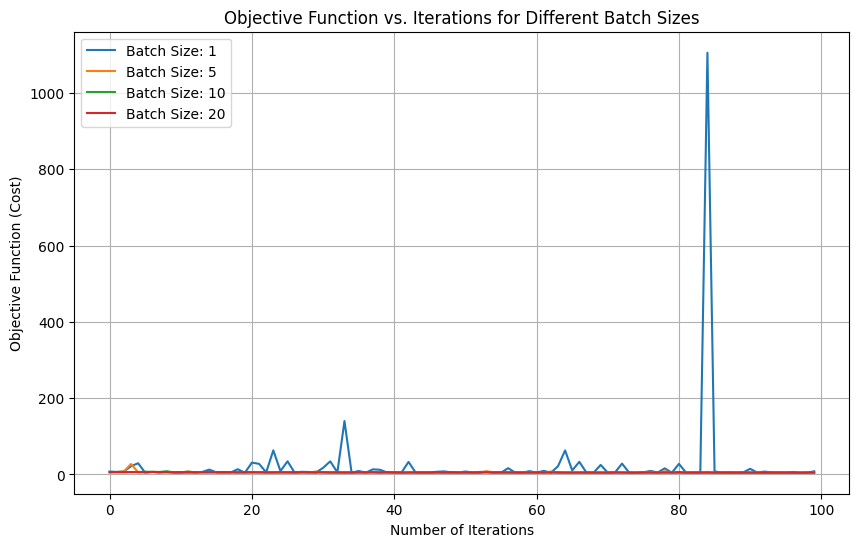

In [177]:
plt.figure(figsize=(10, 6))

for batch_size, history in cost_history.items():
    plt.plot(range(len(history)), history, label=f'Batch Size: {batch_size}')

plt.title('Objective Function vs. Iterations for Different Batch Sizes')
plt.xlabel('Number of Iterations')
plt.ylabel('Objective Function (Cost)')
plt.legend()
plt.grid(True)
plt.show()

[124479.38301721 134962.60416714 148455.01094009 136046.07968998]


Text(0.5, 1.0, 'Predicted House Prices for Different Batch Sizes')

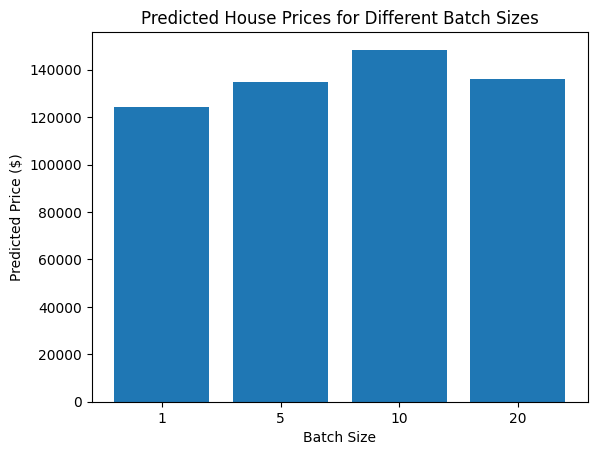

In [179]:
Prices = np.zeros(4)
for n in range(4):
  # Re-initialize theta for batch size 20
  theta_optimal = np.zeros(X.shape[1])

  # Train the model with batch size 20
  theta_optimal, _ = minibatch_gradient_descent(X, y, theta_optimal, alpha, num_iters, batch_size=batch_sizes[n])

  # Create input array for prediction (population of 160,000 -> 16 in 10,000s)
  X_predict = np.array([1, 16])

  # Calculate the predicted price
  predicted_price_tens_thousands = X_predict.dot(theta_optimal)

  # Convert to dollars
  predicted_price_dollars = predicted_price_tens_thousands * 10000

  Prices[n]=predicted_price_dollars

print(Prices)
Batches = ['1','5','10','20']

plt.bar(Batches, Prices)
plt.xlabel('Batch Size')
plt.ylabel('Predicted Price ($)')
plt.title('Predicted House Prices for Different Batch Sizes')

Looking at the objective function plot, the line corresponding to Batch Size = 1 (Stochastic Gradient Descent or SGD) exhibits significantly more noise than the lines for larger batch sizes (5, 10, and 20). Running the code for the bar graph a few times confirms this as well; the batch size of 1 is very inconsistent compared to the larger ones.

# Problem 3 (20 pts.)
 Use the Scikit-learn breast cancer Wisconsin dataset and a logistic regression
model to classify breast cancers. You must recursively eliminate features to find the best
two features to perform the classification. Evaluate the model using various classification
metrics and report your findings. Use a 70%-30% split.


In [180]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (398, 30)
Shape of X_test: (171, 30)
Shape of y_train: (398,)
Shape of y_test: (171,)


In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Instantiate a LogisticRegression model
model = LogisticRegression(random_state=42)

# Instantiate an RFE object
rfe = RFE(estimator=model, n_features_to_select=2)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Identify the indices of the selected features
selected_feature_indices = rfe.support_

# Print the names of the selected features
selected_feature_names = cancer.feature_names[selected_feature_indices]
print("Selected features:", selected_feature_names)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected features: ['mean concavity' 'worst concavity']


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:
from sklearn.linear_model import LogisticRegression

# Filter the training feature data to include only the selected features
X_train_selected = X_train[:, selected_feature_indices]

# Instantiate a new LogisticRegression model
model_selected_features = LogisticRegression(random_state=42, max_iter=1000)

# Train the new logistic regression model
model_selected_features.fit(X_train_selected, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Filter the test feature data to include only the selected features
X_test_selected = X_test[:, selected_feature_indices]

# Make predictions on the filtered test data
y_pred = model_selected_features.predict(X_test_selected)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC AUC - need predicted probabilities
y_prob = model_selected_features.predict_proba(X_test_selected)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Print the calculated metrics
print("Classification Metrics with Selected Features:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Classification Metrics with Selected Features:
Accuracy: 0.8596
Precision: 0.8443
Recall: 0.9537
F1-score: 0.8957
ROC AUC: 0.9377


In [185]:
print("\n--- Findings from Model with Selected Features ---")
print(f"\nSelected features: {selected_feature_names}")

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


--- Findings from Model with Selected Features ---

Selected features: ['mean concavity' 'worst concavity']

Classification Metrics:
Accuracy: 0.8596
Precision: 0.8443
Recall: 0.9537
F1-score: 0.8957
ROC AUC: 0.9377


# Problem 4 (25 pts.)
Construct a neural network with a single hidden layer containing two neurons
using Tensorflow. Use ReLU as activation function. Optimize the network with stochastic
gradient descent method. Choose mean squared error to calculate the loss. Fit the housing
prices dataset found on LMS using the network. Use the trained neural network model
to predict the price of a house in a city with population of 165, 000. Calculate a useful
regression metric. Plot the training and validation losses. Use a 70%-30% split for the
training and validation dataset. The architecture of the neural network and the optimizer
are fixed for this problem. Therefore, you need to choose a suitable learning rate and
number of epochs to minimize the loss. Explain the trends you found in the plots for
training and validation losses.

In [199]:
datafile = 'housing_prices.txt'
data = np.loadtxt(datafile, delimiter=',')
X = X_housing[:, 1].reshape(-1, 1)  # Reshape population to be a 2D array
y = y_housing[:, 0]

print(X.shape)
print(y.shape)

(97, 1)
(97,)


In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (67, 1)
Shape of X_val: (30, 1)
Shape of y_train: (67,)
Shape of y_val: (30,)


In [201]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Construct the neural network
model = Sequential([
    Dense(2, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [202]:
from tensorflow.keras.optimizers import SGD

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mse')

In [203]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)

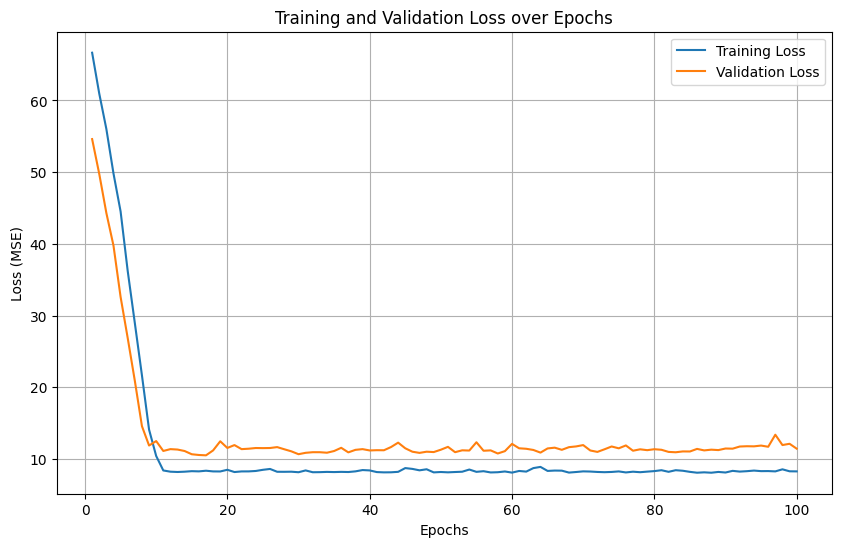

In [204]:
# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [205]:
from sklearn.metrics import mean_squared_error

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate Mean Squared Error
mse = mean_squared_error(y_val, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print("Evaluation Metrics on Validation Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Evaluation Metrics on Validation Set:
Mean Squared Error (MSE): 11.4555
Root Mean Squared Error (RMSE): 3.3846


In [206]:
# Create input array for prediction (population of 165,000 -> 16.5 in 10,000s)
X_predict = np.array([[16.5]])

# Apply the same scaler used for training data
X_predict_scaled = scaler.transform(X_predict)

# Predict the price using the trained neural network model
predicted_price_scaled = model.predict(X_predict_scaled)

# The target variable (y_housing) was not scaled, so the prediction is in the original units (tens of thousands of dollars).
predicted_price_tens_thousands = predicted_price_scaled[0][0]

# Convert to dollars
predicted_price_dollars = predicted_price_tens_thousands * 10000

print(f"Predicted price for a house in a city with population of 165,000: ${predicted_price_dollars:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted price for a house in a city with population of 165,000: $170008.48


In [207]:
print("\n--- Analysis of Loss Curves ---")

# Observe initial loss values
initial_train_loss = history.history['loss'][0]
initial_val_loss = history.history['val_loss'][0]
print(f"Initial Training Loss: {initial_train_loss:.4f}")
print(f"Initial Validation Loss: {initial_val_loss:.4f}")

# Observe final loss values
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")



--- Analysis of Loss Curves ---
Initial Training Loss: 66.6576
Initial Validation Loss: 54.6160
Final Training Loss: 8.2862
Final Validation Loss: 11.4555


#
Both training and validation loss initially decrease rapidly, indicating the model is learning effectively.
After about 14 epochs, both the Training and Validation losses flatten out, but only the validation loss starts increasing very slowly.

The reason the validation loss curve starts to increase is that after around 14 epochs the model starts to overfit the data

The minimum validation loss appears to occur around 14 epochs, making it a suitable number to go with. The learning rate used in this case was 0.01 and appeared to be suitable based off of the loss curves
